<a href="https://colab.research.google.com/github/arunp77/Machine-Learning/blob/main/PCA_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Principle Componenet Analysis (PCA)**

---

(For more details see: https://arunp77.github.io/pca-analysis.html)

---

Principal component analysis (PCA) is a statistical procedure that is commonly used to reduce the dimensionality of large data sets. It does this by transforming the data into a new coordinate system where the new variables are linear combinations of the original variables. The new variables are chosen so that they capture the most variance in the data.

## Process of doing the PCA
Principal Component Analysis (PCA) is a dimensionality reduction technique commonly used in data analysis and machine learning. It helps uncover the underlying structure in high-dimensional datasets by transforming the data into a new coordinate system, where the axes are aligned with the directions of maximum variance.

Here's a more detailed explanation of the PCA process:
<li><strong>Centering the Data:</strong>The first step in PCA is to standardize the data. This means subtracting the mean from each variable and then dividing by the standard deviation. This ensures that all of the variables are on the same scale and that they have a mean of zero and a standard deviation of one. This ensures that the data is centered around the origin.</li>

$$X_c = X- \bar{X}$$

where:
<ul>
    <li>\(\bar{X}\) is the mean of each feature from the corresponding values.</li>
</ul>
<li><strong>Computing the Covariance Matrix: </strong>The covariance matrix is a square matrix that measures the correlation between each pair of variables. The covariance between two variables is equal to the average of the product of the deviations from the mean for those two variables.</li>
$$C(x, y) = \frac{X_c^T \cdot X_c}{m-1}$$
where:
<ul>
    <li>\(X_c^T\): Transpose of the centered data matrix \(X_c\). This operation swaps the rows and columns of \(X_c\).</li>
    <li>\(X_c^T\cdot X_c\): Matrix multiplication of the transposed centered data \(X_c^T\) with the original centered data \(X_c\). This results in a square matrix with dimensions \(n\times n\).</li>
    <li>\(1/(m-1)\): This scaling factor is used to normalize the covariance matrix. It's common to divide by \(m-1\) instead of \(m\) to account for the degrees of freedom in the sample. This makes the covariance matrix an unbiased estimator of the population covariance matrix.</li>
</ul>
<li><strong>Eigenvalue Decomposition: </strong>The eigenvectors and eigenvalues of the covariance matrix are the directions and magnitudes of the data's variation. The eigenvectors are the columns of a matrix \(C\), and the eigenvalues are the diagonal entries of a diagonal matrix \(\Lambda\).</li>

$$C\cdot v_i = \lambda_i \cdot v_i.$$

The eigen vectors $v_i$ is the $i-$th eigenvectors, $\lambda_i$ is the $i-$ the eigenvalues, and $\cdot$ denotes matrix multiplication. Each eigen vectors are orthogonal to one another and form an orthogonal basis for the data. It also represent the directions of maximum varaince, and the corressponding eigenvalues indicate the magnitude of varaince along those directions.

<li><strong>Sorting and Selecting Principal Components: </strong>The eigenvalues are sorted in descending order, and the corresponding eigenvectors are arranged accordingly. The principal components are selected based on the desired dimensionality reduction. If you want to reduce the data to k dimensions, you select the top k eigenvectors. More precisely,
a common rule of thumb is to choose \(k\) principal components, where \(k\) is the maximum number of components that explain at least \(95\%\) of the varaince in the data.
</li>
<li><strong>Project the data onto the principal components: </strong>The original data is then projected onto the selected principal components. The transformed data matrix \(Y\) is given by:</li>

$$Y = W^T \cdot X_c$$

where $W^T$ is the transpose of matrix of eigenvectors and $X_c$ is the matrix of the standardized data.

<li><strong>Normalize the principal components: </strong>The principal components may not be normalized, which means that they may not have unit variance. To normalize the principal components, we divide each component by its standard deviation:</li>

$$Y = \frac{Y}{||Y||}$$

where:
<ul>
    <li>\(Y\) is the matrix of normalized principle components,</li>
    <li>\(||Y||\) is the frobenius norm of the mtrix \(Y\).</li>
</ul>
<li>The new coordinate in \(Y\) represent the data in the principle component space. The first principal component (PC1) captures the most varaince, followd by (PC2), and so on. By choosing a subset of the principal components, you can achieve dimensionality reduction while retaining most of the information present in the original data.</li>
</ul>


### Example

Let's walk through a simplified mathematical example of Principal Component Analysis (PCA) using a small dataset. Consider the following 2D dataset with three observations:

\begin{pmatrix}
1 & 2 \\
2 & 3 \\
3 & 4
\end{pmatrix}


<li><strong>Step 1: Centering the Data</strong>Calculate the mean of each feature and center the data by subtracting the means: </li>

$$\bar{X} = \left[\frac{1+2+3}{3}   ~~~~ \frac{2+3+4}{3}\right] = [2 ~~~~ 3]$$

$$X_c = X- \bar{X} = \begin{pmatrix}
-1 & -1 \\
0 & 0 \\
1 & 1
\end{pmatrix}$$

<li><strong>Step 2: Covariance Matrix</strong></li>
$$C = \frac{X_c^T\cdot X_c}{m-1} = \frac{1}{2} \begin{pmatrix}2 &2 \\ 2 & 2 \end{pmatrix} = \begin{pmatrix} 1 & 1 \\ 1 & 1 \end{pmatrix}$$

<li><strong>Step 3: Eigenvalue Decomposition </strong>Find the eigen values \(\lambda_i\) and eigenvectors \(v_i\) of C:</li>

$$\text{det}(C - \lambda I) = 0$$

$$\text{det} \left(\begin{pmatrix} 1 - \lambda & 1 \\ 1 & 1-\lambda \end{pmatrix}\right) = 0$$

Solving for $\lambda$ gives $\lambda_1 =0$ and $\lambda_2 =2$.
<ul>
    <li>For \(\lambda = 0\), the corresponding eigenvectors is \([1, -1]^T\).</li>
    <li>For \(\lambda = 2\), the corresponding eigenvectors is \([1, 1]^T\).</li>
</ul>
<li><strong>Step 4: Sorting and Selecting Principal Components</strong> Sort the eigenvectors by their corresponding eigenvalues in descending order:</li>
$$W = \begin{pmatrix} 1 & 1 \\ -1 & 1 \end{pmatrix}$$
<li><strong>Step 5: Transforming the Data</strong> Project the centered data onto the new basis:</li>
$$Y = X_c \cdot W = \begin{pmatrix} -1 & -1 \\ 0 & 0 \\ 1 & 1 \end{pmatrix} \cdot \begin{pmatrix} 1 & 1 \\ -1 & 1 \end{pmatrix} = \begin{pmatrix} -2 & 0 \\ 0 & 0 \\ 2 & 0 \end{pmatrix}$$
The transformed matrix \(Y\) representes the dataset in the principal component space.

This is a simplified example, but it illustrates the key steps of PCA: centering the data, computing the covariance matrix, finding eigenvectors and eigenvalues, selecting principal components, and transforming the data. In practice, PCA is applied to high-dimensional datasets for efficient dimensionality reduction.


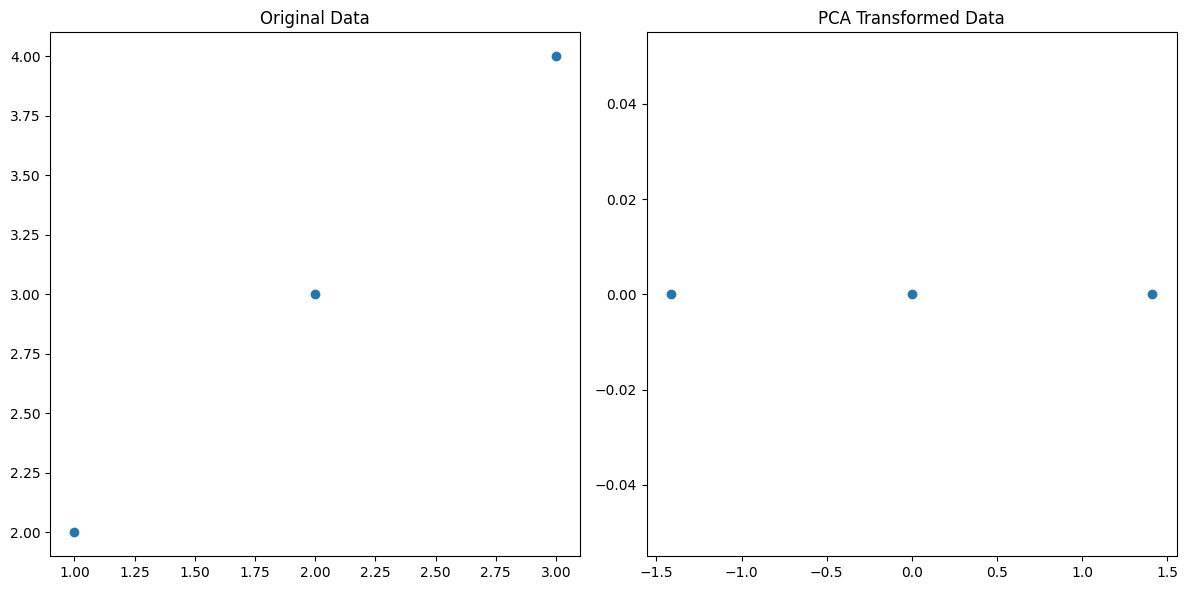

In [1]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Sample 2D dataset
X = np.array([[1, 2], [2, 3], [3, 4]])

# Step 1: Centering the Data
mean_X = np.mean(X, axis=0)
X_centered = X - mean_X

# Step 2: Covariance Matrix
cov_matrix = np.cov(X_centered, rowvar=False)

# Step 3: Eigenvalue Decomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Step 4: Sorting and Selecting Principal Components
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvectors_sorted = eigenvectors[:, sorted_indices]
principal_components = eigenvectors_sorted[:, :2]  # Selecting the top 2 principal components

# Step 5: Transforming the Data
X_pca = X_centered.dot(principal_components)

# Plotting the original and transformed data
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1]) # selecting all the rows (:) of the first column (0) and second column (1) in a NumPy array or matrix X
plt.title('Original Data')

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.title('PCA Transformed Data')

plt.tight_layout()
plt.show()


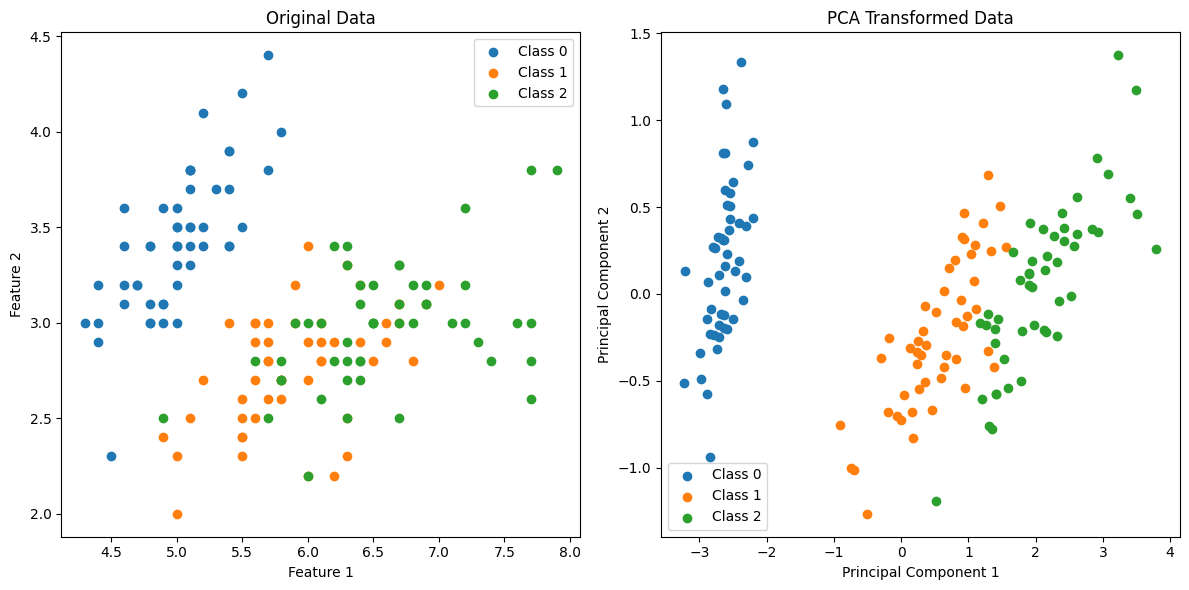

In [14]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load Iris dataset as an example
iris = load_iris()
X = iris.data
y = iris.target

# Apply PCA for visualization (reduce to 2 components for simplicity)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualize the original and PCA-transformed data side by side
plt.figure(figsize=(12,6))

# Plot original data
plt.subplot(1, 2, 1)
for i in range(len(np.unique(y))):
    plt.scatter(X[y == i, 0], X[y == i, 1], label=f'Class {i}')

plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Plot PCA-transformed data
plt.subplot(1, 2, 2)
for i in range(len(np.unique(y))):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=f'Class {i}')

plt.title('PCA Transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

plt.tight_layout()
plt.show()

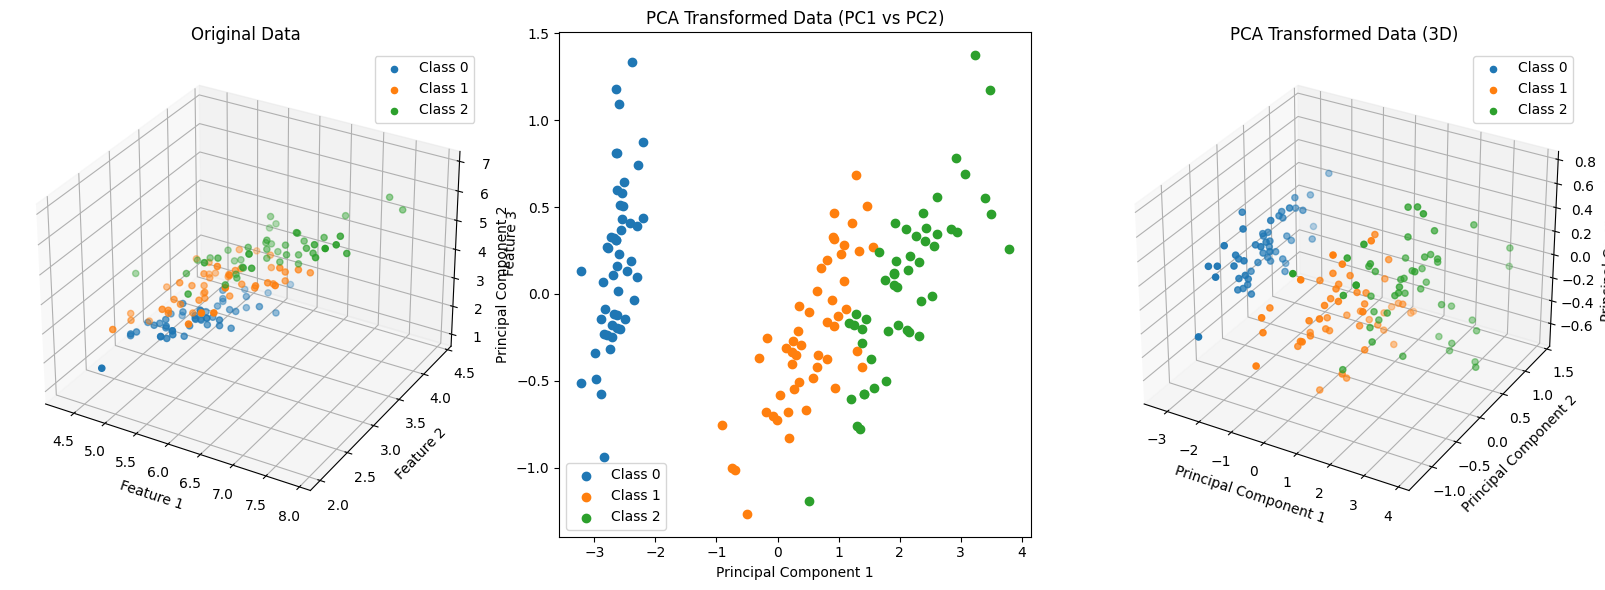

In [21]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load Iris dataset as an example
iris = load_iris()
X = iris.data
y = iris.target

# Apply PCA for visualization (reduce to 3 components this time)
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Visualize the original and PCA-transformed data
fig = plt.figure(figsize=(16, 6))

# Plot original data
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
for i in range(len(np.unique(y))):
    ax1.scatter(X[y == i, 0], X[y == i, 1], X[y == i, 2], label=f'Class {i}')

ax1.set_title('Original Data')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.set_zlabel('Feature 3')
ax1.legend()

# Plot PCA-transformed data
ax2 = fig.add_subplot(1, 3, 2)
for i in range(len(np.unique(y))):
    ax2.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=f'Class {i}')

ax2.set_title('PCA Transformed Data (PC1 vs PC2)')
ax2.set_xlabel('Principal Component 1')
ax2.set_ylabel('Principal Component 2')
ax2.legend()

ax3 = fig.add_subplot(1, 3, 3, projection='3d')
for i in range(len(np.unique(y))):
    ax3.scatter(X_pca[y == i, 0], X_pca[y == i, 1], X_pca[y == i, 2], label=f'Class {i}')

ax3.set_title('PCA Transformed Data (3D)')
ax3.set_xlabel('Principal Component 1')
ax3.set_ylabel('Principal Component 2')
ax3.set_zlabel('Principal Component 3')
ax3.legend()

plt.tight_layout()
plt.show()

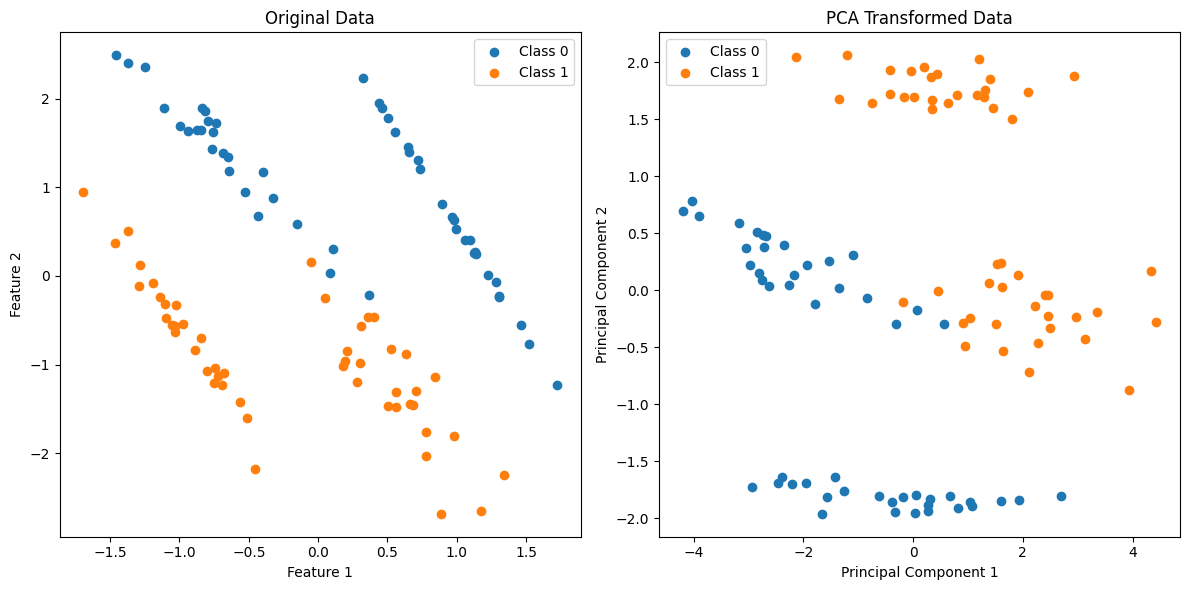

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification

# Generate a synthetic dataset with 5 features
X, y = make_classification(n_samples=100, n_features=5, n_classes=2, random_state=42)

# Apply PCA for visualization (reduce to 2 components for simplicity)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualize the original and PCA-transformed data side by side
plt.figure(figsize=(12, 6))

# Plot original data
plt.subplot(1, 2, 1)
for i in range(len(np.unique(y))):
    plt.scatter(X[y == i, 0], X[y == i, 1], label=f'Class {i}')

plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Plot PCA-transformed data
plt.subplot(1, 2, 2)
for i in range(len(np.unique(y))):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=f'Class {i}')

plt.title('PCA Transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

plt.tight_layout()
plt.show()


In [5]:
import numpy as np


class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        # center the data
        self.mean = np.mean(X, axis=0)
        X = X - self.mean

        # compute the covariance matrix
        cov = np.cov(X, rowvar=False)

        # compute the eigenvalues and eigenvectors of the covariance matrix
        eigenvalues, eigenvectors = np.linalg.eigh(cov)

        # sort the eigenvalues and eigenvectors in decreasing order
        idx = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idx]
        eigenvectors = eigenvectors[:, idx]

        # store the first n_components eigenvectors as the principal components
        self.components = eigenvectors[:, : self.n_components]

    def transform(self, X):
        # center the data
        X = X - self.mean

        # project the data onto the principal components
        X_transformed = np.dot(X, self.components)

        return X_transformed

# Example

**Let's pick an Example Dataset** For this, you can refere it to: https://github.com/patchy631/machine-learning

In [6]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine, load_iris

# Load DataSet
wine_data = load_wine()
X, y = wine_data['data'], wine_data['target']

print(X.shape)
print(y.shape)

(178, 13)
(178,)


In [7]:
import pandas as pd

# Extract data and target from wine_data
data = wine_data['data']
target = wine_data['target']

# Combine data and target into a single dictionary for DataFrame creation
wine_data_dict = {feature: data[:, idx] for idx, feature in enumerate(wine_data['feature_names'])}
wine_data_dict['target'] = target

# Create a DataFrame from the dictionary
df = pd.DataFrame(wine_data_dict)

# Display the DataFrame
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


**Plotting two random features of raw data**
Considering 2 random features doesn’t reveal muchof how the data looks like

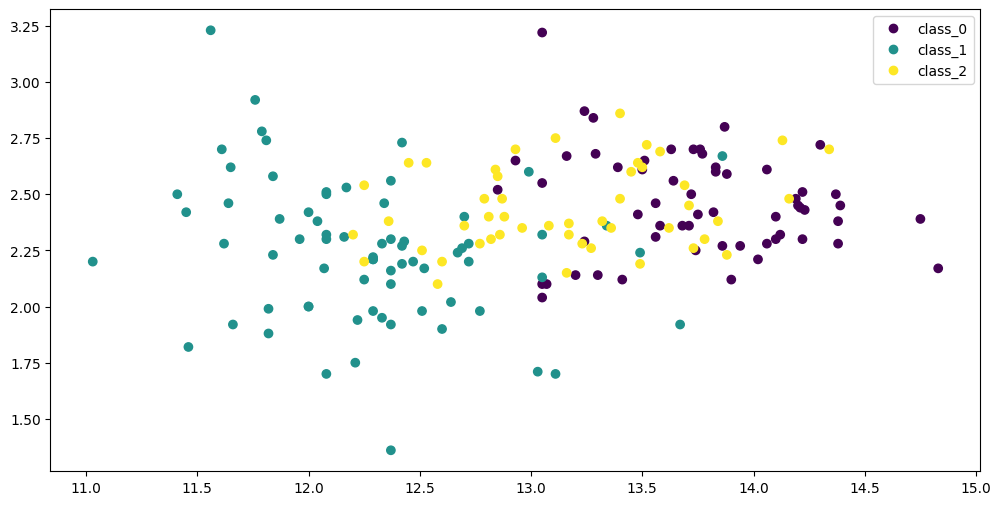

In [9]:
# Visualize the original and PCA-transformed data side by side
plt.figure(figsize=(12, 6))

plot = plt.scatter(X[:,0], X[:,2], c=y)

plt.legend(handles=plot.legend_elements()[0],
           labels=list(wine_data['target_names']))

plt.show()

Applying PCA on raw data

In [11]:
# create a PCA object with 2 components
pca = PCA(n_components=2)

# fit the data
pca.fit(X)

# transform the data using the PCA object
X_transformed = pca.transform(X)

print(X_transformed.shape)

(178, 2)


Plotting PCA results

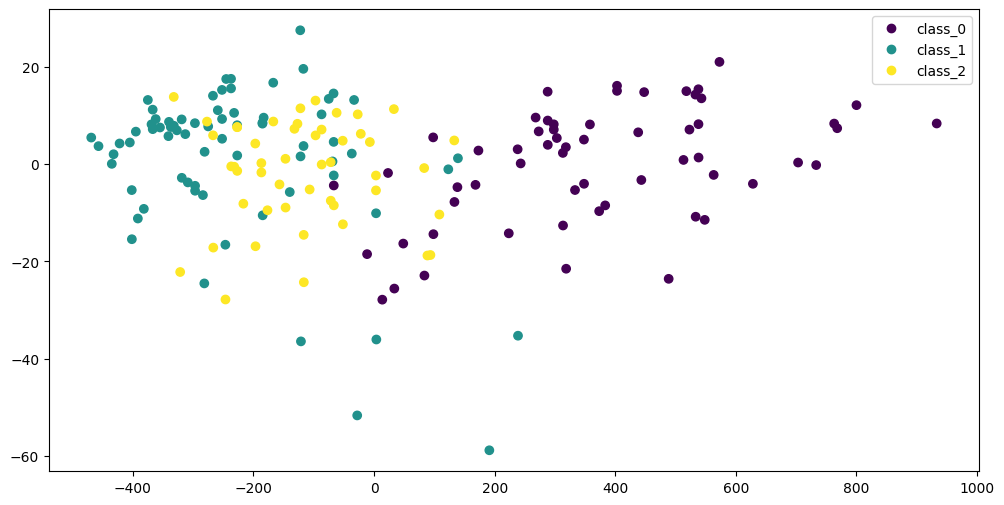

In [12]:
# Visualize the original and PCA-transformed data side by side
plt.figure(figsize=(12, 6))

plot = plt.scatter(X_transformed[:,0], X_transformed[:,1], c=y)

plt.legend(handles=plot.legend_elements()[0],
           labels=list(wine_data['target_names']))

plt.show()

We can do better, check this out 👇
PCA is sensitive to the scale!
Let's see if normalizing each feature by StandardScaler helps!

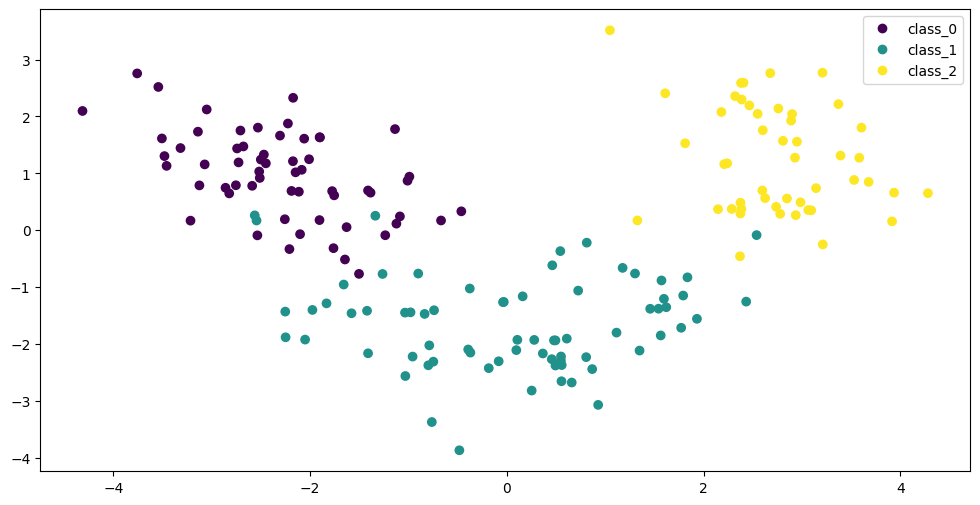

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Normalise the data
scaler = StandardScaler()
scaler.fit(X)
X_normalised = scaler.transform(X)

# Apply PCA now
pca.fit(X_normalised)

# transform the data using the PCA object
X_transformed = pca.transform(X_normalised)

# Visualize the original and PCA-transformed data side by side
plt.figure(figsize=(12, 6))

plot = plt.scatter(X_transformed[:,0], X_transformed[:,1], c=y)

plt.legend(handles=plot.legend_elements()[0],
           labels=list(wine_data['target_names']))

plt.show()

We can see a clear distinction amongst the classes!! 🙂

<div class="markdown-google-sans">

## More Resources

### Working with Notebooks in Colab

</div>

- [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### Working with Data
</div>

- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb)
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### Machine Learning Crash Course

<div>

These are a few of the notebooks from Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Linear regression with tf.keras using synthetic data](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### Using Accelerated Hardware
</div>

- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TensorFlow with TPUs](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Featured examples

</div>

- [NeMo Voice Swap](https://colab.research.google.com/github/NVIDIA/NeMo/blob/stable/tutorials/VoiceSwapSample.ipynb): Use Nvidia's NeMo conversational AI Toolkit to swap a voice in an audio fragment with a computer generated one.

- [Retraining an Image Classifier](https://tensorflow.org/hub/tutorials/tf2_image_retraining): Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- [Text Classification](https://tensorflow.org/hub/tutorials/tf2_text_classification): Classify IMDB movie reviews as either *positive* or *negative*.
- [Style Transfer](https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization): Use deep learning to transfer style between images.
- [Multilingual Universal Sentence Encoder Q&A](https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa): Use a machine learning model to answer questions from the SQuAD dataset.
- [Video Interpolation](https://tensorflow.org/hub/tutorials/tweening_conv3d): Predict what happened in a video between the first and the last frame.
